<h1><center>HY473
<br>
4th Assignment
<br>
Athanasios Panagiotis Rentzelas
<br>
csd4734</center></h1>  

In [1]:
import numpy as np
import csv 
import matplotlib.pyplot as plt
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
from tqdm.auto import tqdm
import random

In [2]:
with open('dataset.csv', 'rt') as f:
    reader = csv.reader(f)
    next(reader)
    data_as_list = list(reader)
    data_as_array = np.array(data_as_list,dtype=float)

    id = data_as_array[:,0]
    x_0 = data_as_array[:,1]
    x_1 = data_as_array[:,2]
    data= data_as_array[:,1:3]
    labels=data_as_array[:,3]


<font size=5>Question 1: Single-sample Perceptron </font>

1.

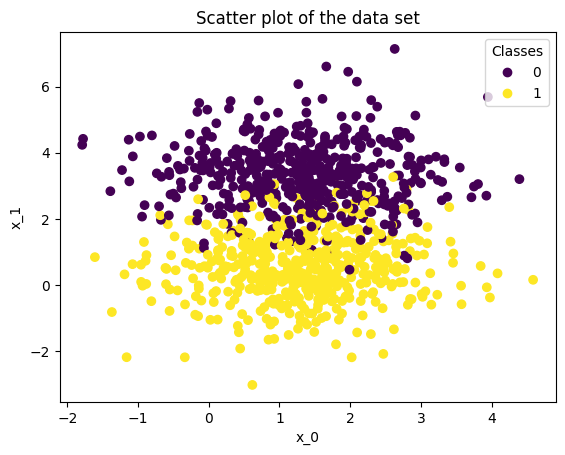

In [3]:
scatter = plt.scatter(x_0,x_1,c=labels)
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.legend((scatter.legend_elements()[0][0], scatter.legend_elements()[0][1]), ('0', '1'), loc='upper right',title="Classes")
plt.title('Scatter plot of the data set')


plt.show()

From the scatter plot, we observe overlapping in our data set, indicating that it is not linearly separable.

In [4]:
class Scheduler:
    def __init__(self,n_samples):
        self.lr=0
        self.n_samples=n_samples
        self.k=0
        self.i=1
    def get_next_lr(self):
        self.k+=self.i %self.n_samples  
        self.i+=1  
        self.lr=1/np.sqrt((self.k))
        return self.lr

2.

In [5]:
#A function that returns 1 if the input is greater than 0 and 0 otherwise
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

def train_single_sample(a,y,labels,n_iterations,lr,variable_lr):
    acc_history = []
    k=0
    a_hist=[]
    #We add a column of ones to the data in order to have the bias
    ones = np.ones((data.shape[0], 1))
    #We add a column of zeros to the weights in order to have the bias
    zeros = np.zeros(1)
    a = np.concatenate([a, zeros], axis=0)
    a_hist.append(a)
    y = np.concatenate([data, ones], axis=1)
    out =np.array(y)
    loop = tqdm(range(n_iterations))
    update=0
    
    if(variable_lr==False):
        print("constant_lr")
        for i in loop:
            out = np.array(unit_step_func(np.dot(y, a)))
            acc = np.sum(out == labels) / len(labels)
            acc_history.append(acc)
            a_hist.append(a)
            k = np.random.randint(0, len(y))
            errors = labels[k] - out[k]
            if errors != 0:
                update = lr * (errors) * y[k]
                a = a + update
            
            if(i%1000==0):  #i have put this here in order to have a faster version of the code because tqdm is a bit slow and i want to see the progress
                loop.set_postfix({ 'accuracy': acc,'a':a,'update':update})

    else:
        print("Variable_lr")
        scheduler = Scheduler(n_samples=len(y))
        for i in loop:
            out = np.array(unit_step_func(np.dot(y,a)))
            acc = np.sum(out == labels)/len(labels)
            acc_history.append(acc)
            a_hist.append(a)
            k =np.random.randint(0,len(y))
            errors = labels[k] - out[k]
            if(errors!=0):
                lr = scheduler.get_next_lr()

                update = lr*(errors)*y[k]
                a = a + update   

            if(i%1000==0):  #i have put this here in order to have a faster version of the code because tqdm is a bit slow and i want to see the progress
                loop.set_postfix({ 'accuracy': acc,'a':a,'update':update})
        
    return a_hist[np.argmax(acc_history)+1],acc_history

3.

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_model(pred_a,title):
    margin = 1
    xlim = (np.min(x_0)-margin, np.max(x_0)+margin)
    ylim = (np.min(x_1)-margin, np.max(x_1)+margin)
    sample_rate = 100

    xg = np.linspace(xlim[0], xlim[1], sample_rate)
    yg = np.linspace(ylim[0], ylim[1], sample_rate)
    xx, yy = np.meshgrid(xg, yg)
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
    Xgrid = np.concatenate([Xgrid, np.ones((Xgrid.shape[0], 1))], axis=1)
    z = np.apply_along_axis(unit_step_func, 1, np.dot(Xgrid,pred_a).reshape(xx.shape))

    scatter = plt.scatter(x_0, x_1, c=labels)


    plot = plt.contourf(xg, yg, z, alpha=0.6)
    plt.title(title)
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.show()

4.

In [7]:
#A function that returns the accuracy of the model
alpha = np.random.uniform(-3,6,2)
print("Initial alpha: ",alpha)

Initial alpha:  [-1.49473008 -1.98979892]


In [8]:
pred_a,acc_hist=train_single_sample(alpha,data,labels,100000,1,False)

  0%|          | 0/100000 [00:00<?, ?it/s]

constant_lr


In [9]:
print("The best accuracy is",max(acc_hist))
print("We go this accuracy using a:",pred_a)

The best accuracy is 0.927
We go this accuracy using a: [-0.78216754 -8.29394203 17.        ]


5.

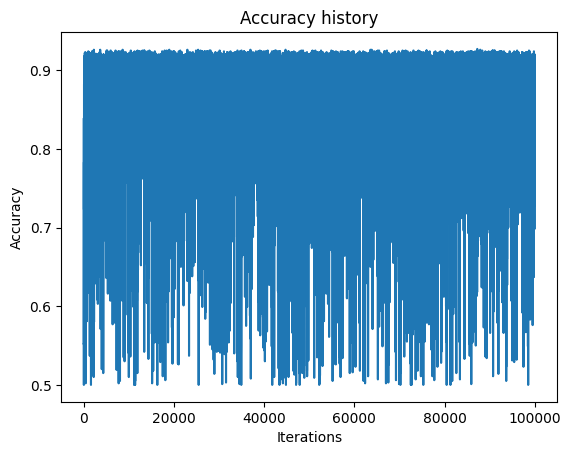

In [10]:
plt.plot(acc_hist)
plt.title('Accuracy history')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

6.

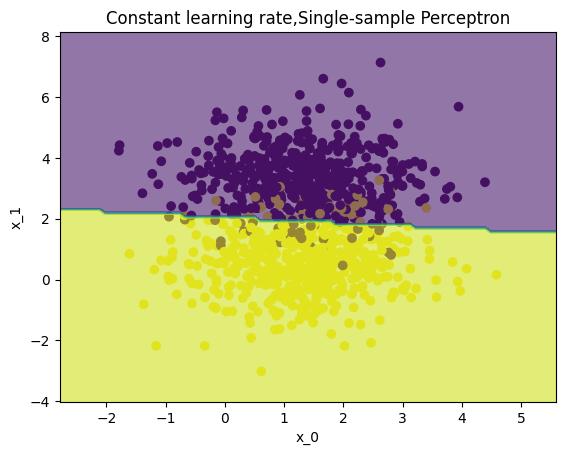

In [11]:
plot_model(pred_a,'Constant learning rate,Single-sample Perceptron')

7.

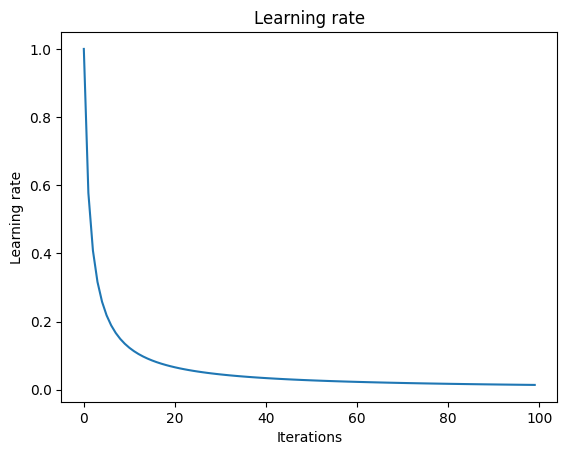

In [12]:
scheduler = Scheduler(n_samples=len(data))
res = np.array([scheduler.get_next_lr() for i in range(100) ])
x = np.arange(100)
plt.plot(x,res)
plt.title('Learning rate')
plt.xlabel('Iterations')
plt.ylabel('Learning rate')
plt.show()

8.

In [13]:
pred_a,acc_hist=train_single_sample(alpha,data,labels,100000,1,True)

  0%|          | 0/100000 [00:00<?, ?it/s]

Variable_lr


In [14]:
print("The best accuracy is",max(acc_hist))
print("We go this accuracy using a:",pred_a)

The best accuracy is 0.927
We go this accuracy using a: [-0.05018653 -0.44158938  0.93251656]


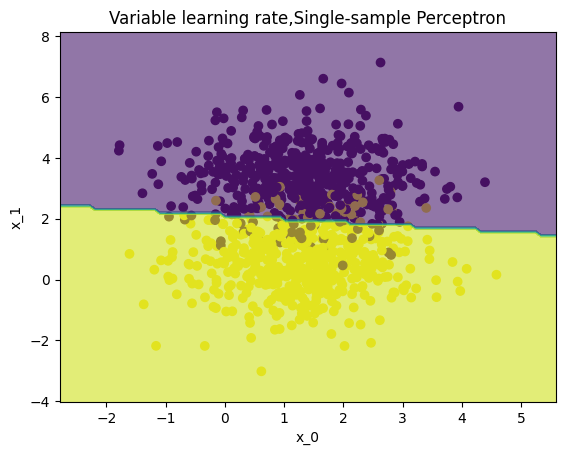

In [15]:
plot_model(pred_a,'Variable learning rate,Single-sample Perceptron')

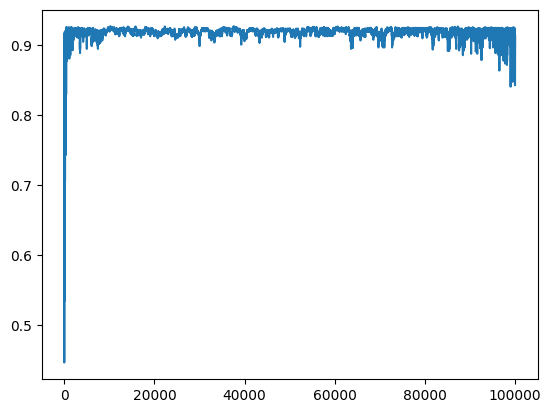

In [16]:
plt.plot(acc_hist)
plt.show()

Compared to the method with a constant learning rate, we observe that the accuracy, using a variable lr, after a certain point, remains near the best accuracy that we can get with our model (but sometimes I observe the oscillations getting higher at the end of the iterations.This, may happen because we choose a value with high error randomly, but the learning rate is small so we get these "falls" in the accuracy.), which for as here, is the single value perceptron.But, after 100k iterations, we can see that the best accuracy is absolutely the same.So, I think, using these conditions, both ways are good, but using a variable lr, we may get better examples in some cases.

<font size=5>Question 2: Batch Perceptron </font>

1.

In [17]:
def train_batch(a,y,labels,n_iterations,lr,variable_lr,theta,batch_size):
    acc_history = []
    k=0
    a_hist=[]
    error_hist=[]
    #We add a column of ones to the data in order to have the bias
    ones = np.ones((data.shape[0], 1))
    #We add a column of zeros to the weights in order to have the bias
    zeros = np.zeros(1)
    a = np.concatenate([a, zeros], axis=0)
    a_hist.append(a)
    y = np.concatenate([data, ones], axis=1)
    out =np.array(y)
    loop = tqdm(range(n_iterations))
    update=0
    print("batch_size:",batch_size)
    if(variable_lr==False):
        print("constant_lr")
        for i in loop:
            dots=np.dot(y,a)
            out = np.array(unit_step_func(dots))
            acc = np.sum(out == labels) / len(labels)
            acc_history.append(acc)
            a_hist.append(a)
            false = np.array([labels - out])
            false = false.T*y
            #We select randomly batch_size rows from the false matrix
            selected_rows = random.sample(range(len(false)), batch_size)
            errors = false[selected_rows]
            errors = np.sum(errors,axis=0)
            update = lr * errors
            errors=np.sum(abs((errors)))
            error_hist.append(errors)
            if(i%(n_iterations/batch_size)==0):
                loop.set_postfix({ 'accuracy': acc,'a':a,'update':update,'lr':lr})
                print("lr:",lr,"errors:",lr*errors)
            if(errors<theta):
                break
            a = a + update
            
    else:
        print("Variable_lr")
        scheduler = Scheduler(n_samples=len(y))
        for i in loop:
            dots=np.dot(y,a)
            out = np.array(unit_step_func(dots))
            acc = np.sum(out == labels) / len(labels)
            acc_history.append(acc)
            a_hist.append(a)
            false = np.array([labels - out])
            false = false.T*y
            #We select randomly batch_size rows from the false matrix
            selected_rows = random.sample(range(len(false)), batch_size)
            errors = false[selected_rows]
            errors = np.sum(errors,axis=0)
            lr = scheduler.get_next_lr()
            update = lr * errors
            errors=np.sum(abs((errors)))
            error_hist.append(errors)
            if(i%(n_iterations/batch_size)==0):
                loop.set_postfix({ 'accuracy': acc,'a':a,'update':update,'lr':lr})
                print("lr:",lr,"errors:",lr*errors)
            if(errors<theta):
                break
            a = a + update
            

            
            
            
    print("Number of iterations needed:",i)
    return a_hist[np.argmax(acc_history)+1],error_hist,acc_history,None

2.

In [18]:
max_acc_a,error_hist,acc_hist,min_err_a=train_batch(alpha,data,labels,100000,1,False,0.01,16)
print("The best accuracy is",max(acc_hist))
print("We go this accuracy using a:",max_acc_a)
print("The minimum error is",min(error_hist))
print("We go this error using a:",min_err_a)
print("The acc of the minimum error is",acc_hist[np.argmin(error_hist)])

  0%|          | 0/100000 [00:00<?, ?it/s]

batch_size: 16
constant_lr
lr: 1 errors: 14.001754997344486
Number of iterations needed: 10
The best accuracy is 0.898
We go this accuracy using a: [  5.29780925 -12.39900168  16.        ]
The minimum error is 0.0
We go this error using a: None
The acc of the minimum error is 0.898


3.

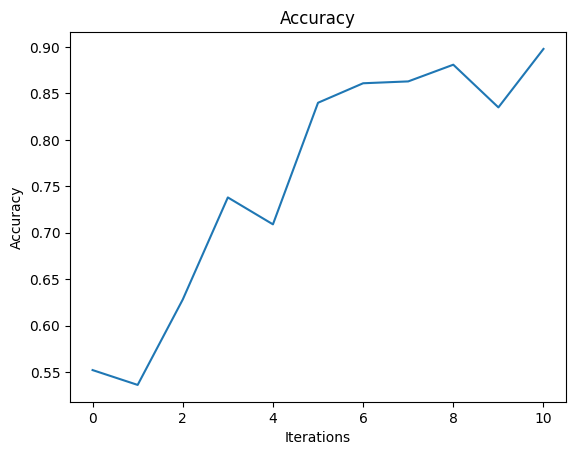

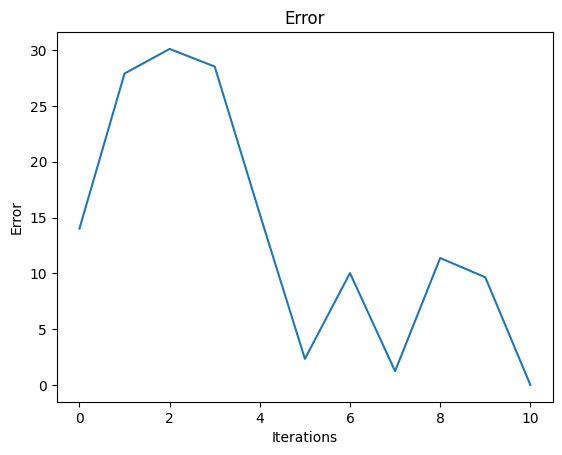

In [19]:
iter = np.arange(len(error_hist))
plt.plot(iter,acc_hist)
plt.title("Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()
plt.plot(iter,error_hist)
plt.title("Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

Here, we observe that the accuracy of the training model, doesn't have many oscillations as we had using a constant learning rate with a single value perceptron approach.

4.

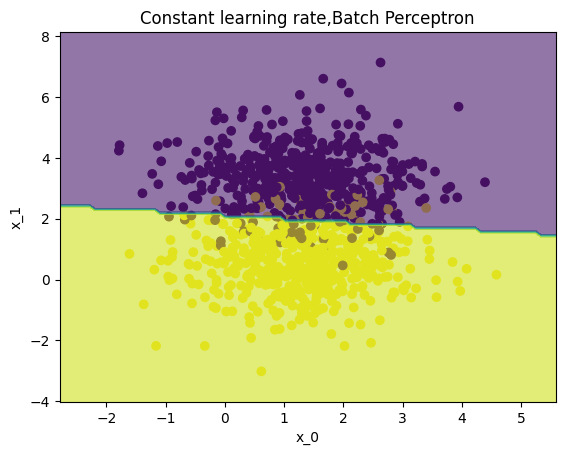

In [20]:
plot_model(pred_a,'Constant learning rate,Batch Perceptron')

5.

In [22]:
max_acc_a,error_hist,acc_hist,min_err_a=train_batch(alpha,data,labels,100000,1,True,0.01,16)
print("The best accuracy is",max(acc_hist))
print("We go this accuracy using a:",max_acc_a)
print("The minimum error is",min(error_hist))
print("We go this error using a:",min_err_a)
print("The acc of the minimum error is",acc_hist[np.argmin(error_hist)])


  0%|          | 0/100000 [00:00<?, ?it/s]

batch_size: 16
Variable_lr
lr: 1.0 errors: 24.664752672036634
Number of iterations needed: 2
The best accuracy is 0.857
We go this accuracy using a: [ 3.80020136 -5.43372399  3.53589838]
The minimum error is 0.0
We go this error using a: None
The acc of the minimum error is 0.857


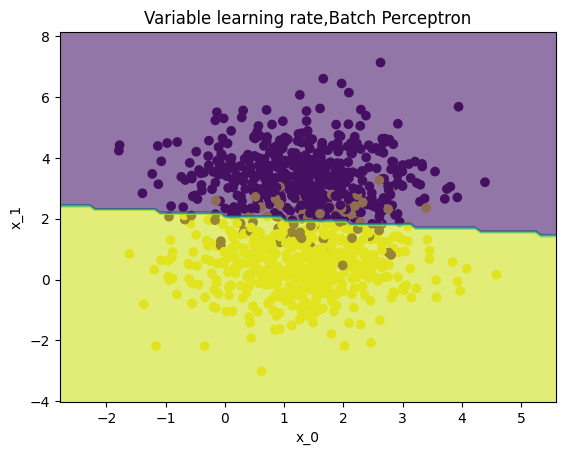

In [23]:
plot_model(pred_a,'Variable learning rate,Batch Perceptron')

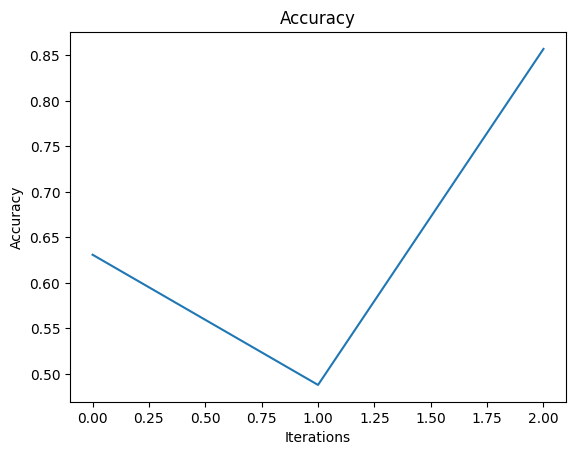

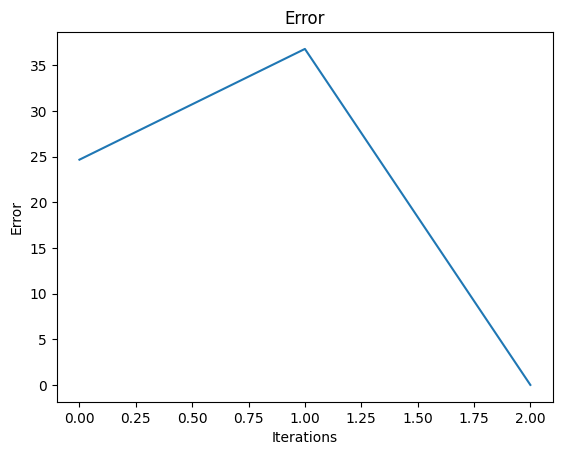

In [24]:
iter = np.arange(len(error_hist))
plt.plot(iter,acc_hist)
plt.title("Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()
plt.plot(iter,error_hist)
plt.title("Error")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

When you run the code block below,I suggest you to collapse the output block below,because it would be a long,difficult to read output log.

In [ ]:
# Open the file in write mode
with open("constant_lr_multiple_test.txt", "w") as file:
    for i in range(60):
        alpha = np.random.uniform(-5, 5, 2)
        errors_hist = []
        acc_hists = []
        file.write("Test " + str(i + 1) + "\n")
        max_acc_a, error_hist, acc_hist, min_err_a = train_batch(alpha, data, labels, 100000, 1, False, 0.01, 16)
        errors_hist.append(min(error_hist))
        acc_hists.append(max(acc_hist))
        file.write("The best accuracy is " + str(max(acc_hist)) + "\n")
        file.write("We got this accuracy using a: " + str(max_acc_a) + "\n")
        file.write("------------------------------------------\n")

    file.write("---------------------END OF TESTS---------------------\n")
    file.write("The average accuracy is: " + str(np.mean(acc_hists)) + "\n")


# Open the file in write mode
with open("variable_lr_multiple_test.txt", "w") as file:
    for i in range(60):
        alpha = np.random.uniform(-5, 5, 2)
        errors_hist = []
        acc_hists = []
        file.write("Test " + str(i + 1) + "\n")
        max_acc_a, error_hist, acc_hist, min_err_a = train_batch(alpha, data, labels, 100000, 1, True, 0.01, 16)
        errors_hist.append(min(error_hist))
        acc_hists.append(max(acc_hist))
        file.write("The best accuracy is " + str(max(acc_hist)) + "\n")
        file.write("We got this accuracy using a: " + str(max_acc_a) + "\n")
        file.write("------------------------------------------\n")

    file.write("---------------------END OF TESTS---------------------\n")
    file.write("The average accuracy is: " + str(np.mean(acc_hists)) + "\n")

After, running multiple tests for both the variable learning rate and the constant learning rate for the mini batch perceptron with batch size equal to 16, we observed the average accuracy to be considerably less for the variable learning rate method compared to the constant learning rate.This, might be happening because, as we take different randomly chosen batches, we use different learning rate each time, when may be the error is bigger for a newer batch compared to the previous one.Also, one more observation that I would like to make, is that with a batch size this small, we may get sometimes 16 values that are all correct when we start our training and this is the reason that I have produced the two output files with the results of an average for both methods.